In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [2]:
ls /kaggle/input/imdb-dataset-of-50k-movie-reviews

'IMDB Dataset.csv'


In [3]:
path = "/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"
import pandas as pd

df = pd.read_csv(path)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


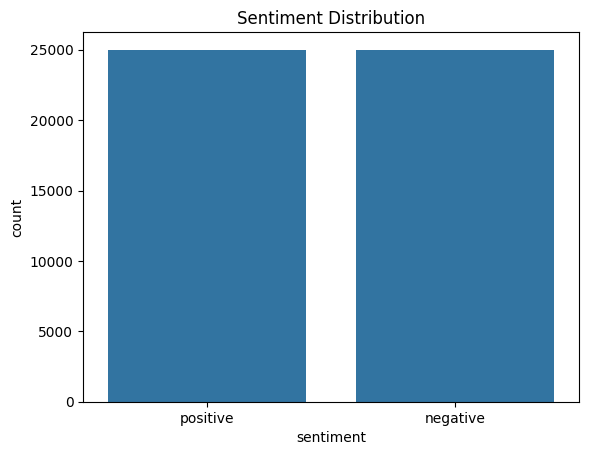

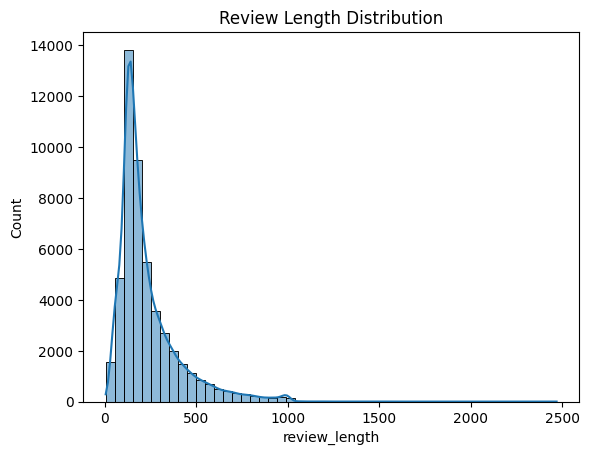

In [5]:
print(df.info())
print(df['sentiment'].value_counts())

# Add review length column
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot sentiment distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

# Plot review length distribution
sns.histplot(data=df, x='review_length', bins=50, kde=True)
plt.title("Review Length Distribution")
plt.show()

In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('<.*?>', '', text)                 # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)            # Remove non-letters
    text = text.lower().split()                      # Lowercase and split
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

df['clean_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      4961
    Positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



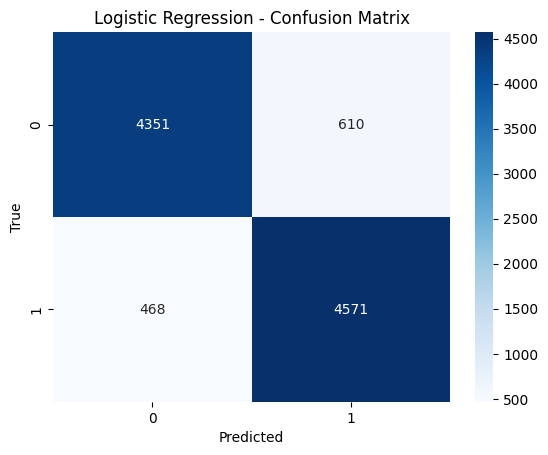


Naive Bayes
              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      4961
    Positive       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



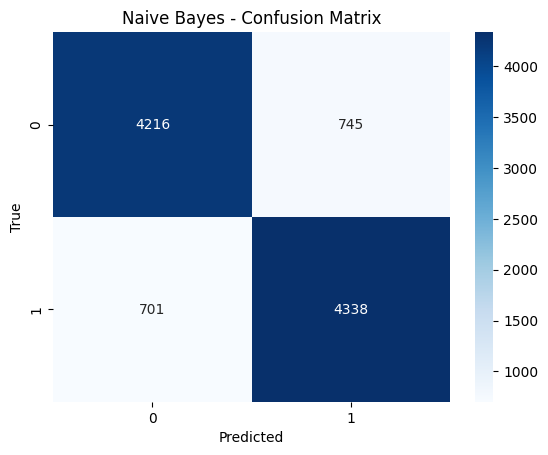


Linear SVM
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4961
    Positive       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



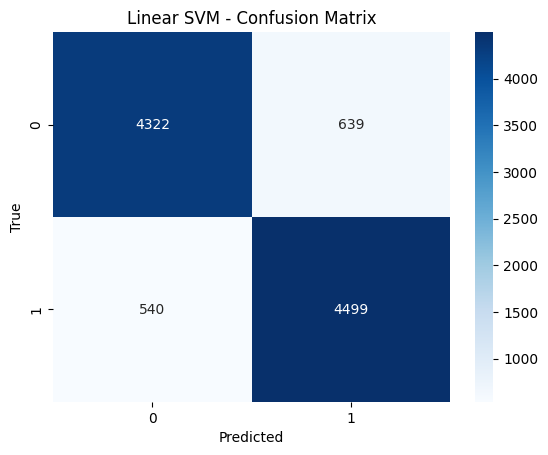

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds, target_names=['Negative', 'Positive']))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

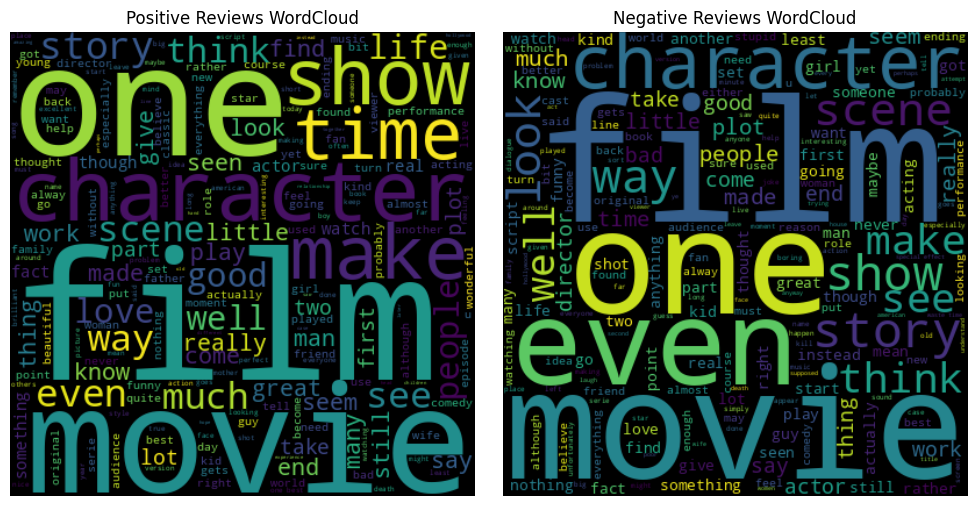

In [11]:
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['clean_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['clean_review'])

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=400).generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=400).generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.tight_layout()
plt.show()# Compute gradients (differences between consecutive embeddings)


In [12]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b9f8e030f130761e7b2c4a0121db819c6386b5975c0d3d5b8a009af21e49d8e7
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [13]:
# Only needed if you want to go further (optional)
# pip install lime
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

class_names = ['Negative', 'Positive']
pipe = make_pipeline(vectorizer, models['Logistic Regression'])

explainer = LimeTextExplainer(class_names=class_names)

idx = 100
exp = explainer.explain_instance(df['clean_review'].iloc[idx], pipe.predict_proba, num_features=10)
print(df['review'].iloc[idx])  # Show original review
exp.show_in_notebook(text=True)

This short film that inspired the soon-to-be full length feature - Spatula Madness - is a hilarious piece that contends against similar cartoons yielding multiple writers. The short film stars Edward the Spatula who after being fired from his job, joins in the fight against the evil spoons. This premise allows for some funny content near the beginning, but is barely present for the remainder of the feature. This film's 15-minute running time is absorbed by some odd-ball comedy and a small musical number. Unfortunately not much else lies below it. The plot that is set up doesn't really have time to show. But it's surely follows it plot better than many high-budget Hollywood films. This film is worth watching at least a few times. Take it for what it is, and don't expect a deep story.


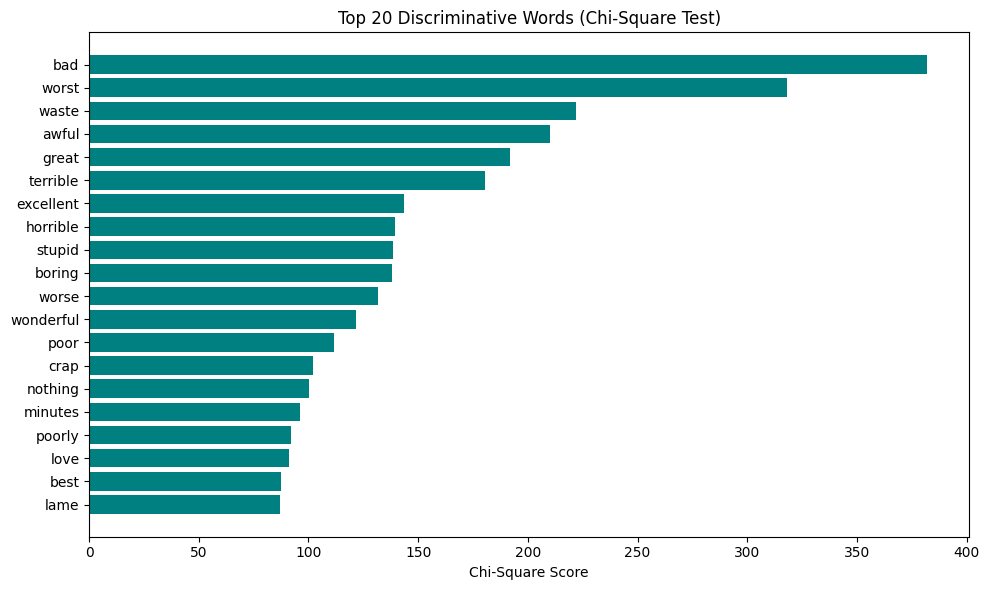

In [14]:
from sklearn.feature_selection import chi2
import numpy as np

# Apply chi2 test
chi2_scores, p_values = chi2(X, y)

# Get feature names from the TF-IDF vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# Sort the top features based on chi2 scores
top_chi2 = np.argsort(chi2_scores)[-20:]

# Display top 20 features most associated with target
top_features = feature_names[top_chi2]
top_scores = chi2_scores[top_chi2]

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_features, top_scores, color='teal')
plt.xlabel("Chi-Square Score")
plt.title("Top 20 Discriminative Words (Chi-Square Test)")
plt.tight_layout()
plt.show()